# Seaborn - Ejercicios
- - -

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings(action="ignore")

In [7]:
from IPython.display import set_matplotlib_formats

In [8]:
set_matplotlib_formats("retina")

- - -

In [9]:
#Crea un dataframe con el dataset del titánic
df = pd.read_csv("https://raw.githubusercontent.com/4data-lab/datasets/master/titanic.csv")

In [10]:
#Muestra las 10 primeras instancias del dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True


In [11]:
# Cuenta los NaN para cada categoria

#for x in ['survived','pclass','sex','age','sibsp','parch','embarked','class','adult_male','deck','embark_town','alive','alone']:
#  print("NaNs in",x,"=",df[x].isna().sum())

for x in list(df.columns):
  print("NaNs in",x,"=",df[x].isna().sum())


NaNs in survived = 0
NaNs in pclass = 0
NaNs in sex = 0
NaNs in age = 177
NaNs in sibsp = 0
NaNs in parch = 0
NaNs in fare = 0
NaNs in embarked = 2
NaNs in class = 0
NaNs in adult_male = 0
NaNs in deck = 688
NaNs in embark_town = 2
NaNs in alive = 0
NaNs in alone = 0


In [12]:
#Rellena los valores NaN con el valor promedio de su categoría
#en el caso de variables categóricas, asígnales una categoría que tenga sentido.

df.dtypes # Vemos que las categóricas con NaN son embarked(2), deck(688) y embark_town(2)

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

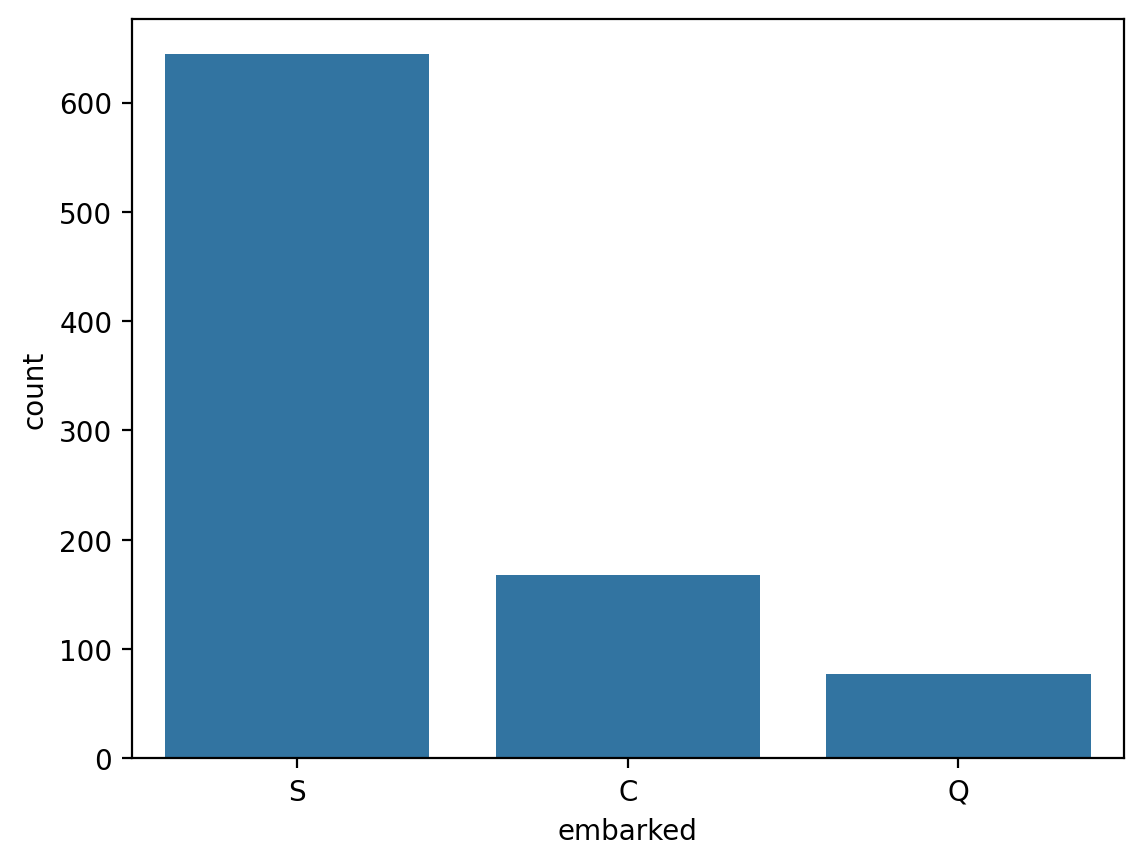

In [13]:
sns.countplot(x="embarked", data=df) #vemos que S es el lugar que más se embarcó, por el que suponemos que nos 2 NaN embarcaron allí también
# Rellenamos embarked(2) con S
df["embarked"]=df["embarked"].fillna("S")

*Frecuencias relativas
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64
*Cantidad de datos que tendrían que corresponer con esa deck
C    199.960591
B    159.290640
D    111.842365
E    108.453202
A     50.837438
F     44.059113
G     13.556650
Name: deck, dtype: float64
C    200.0
B    159.0
D    112.0
E    108.0
A     51.0
F     44.0
G     14.0
Name: deck, dtype: float64
*Comprovamos que al redondear la suma da 688 igualmente
688.0


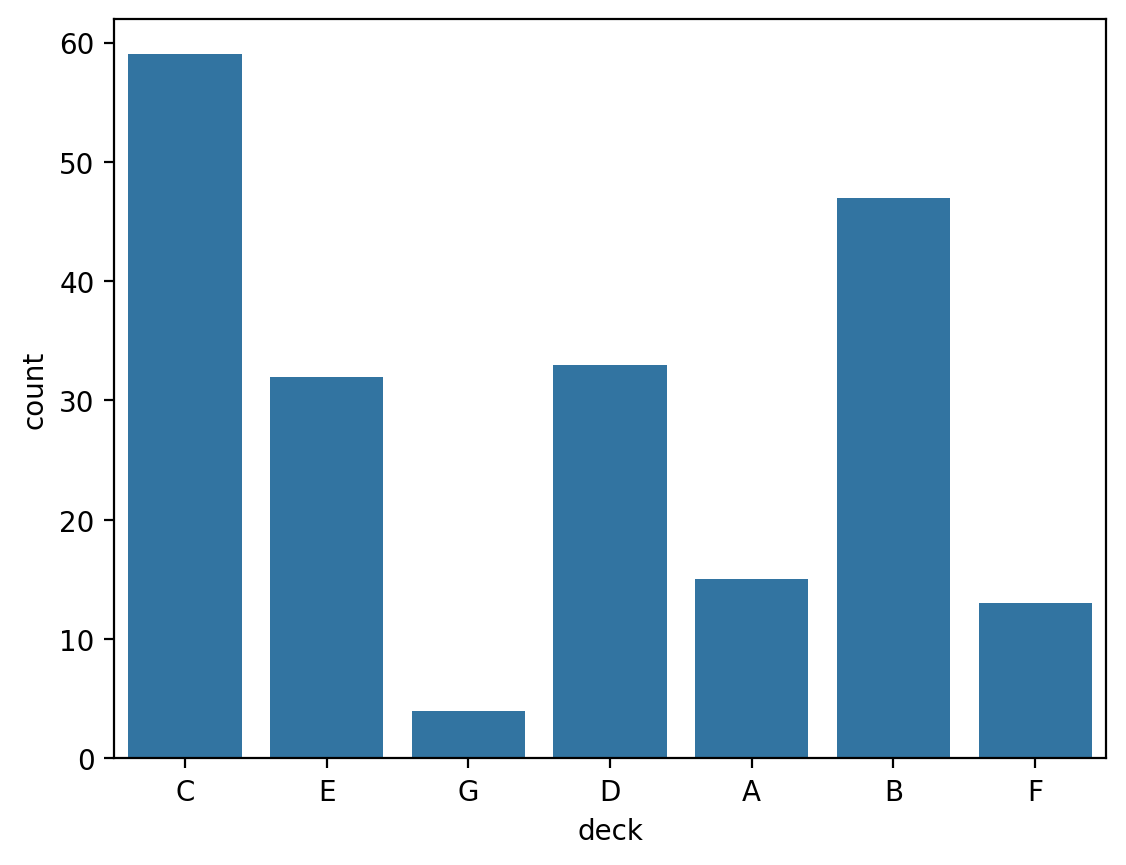

In [14]:
sns.countplot(x="deck", data=df) # Vemos que los datos estan distintamente distribuidos.
print("*Frecuencias relativas")
print(df['deck'].value_counts(normalize=True))
print("*Cantidad de datos que tendrían que corresponer con esa deck")
print(df['deck'].value_counts(normalize=True)*df["deck"].isna().sum()) #Frec relativa * cantidad de NaN que hay (688)
print(round(df['deck'].value_counts(normalize=True)*df["deck"].isna().sum())) #Redondeado a la unidad
print("*Comprovamos que al redondear la suma da {} igualmente".format(df["deck"].isna().sum()))
print(round(df['deck'].value_counts(normalize=True)*df["deck"].isna().sum()).sum())

# Rellenamos deck(688) con

<Axes: xlabel='embark_town', ylabel='count'>

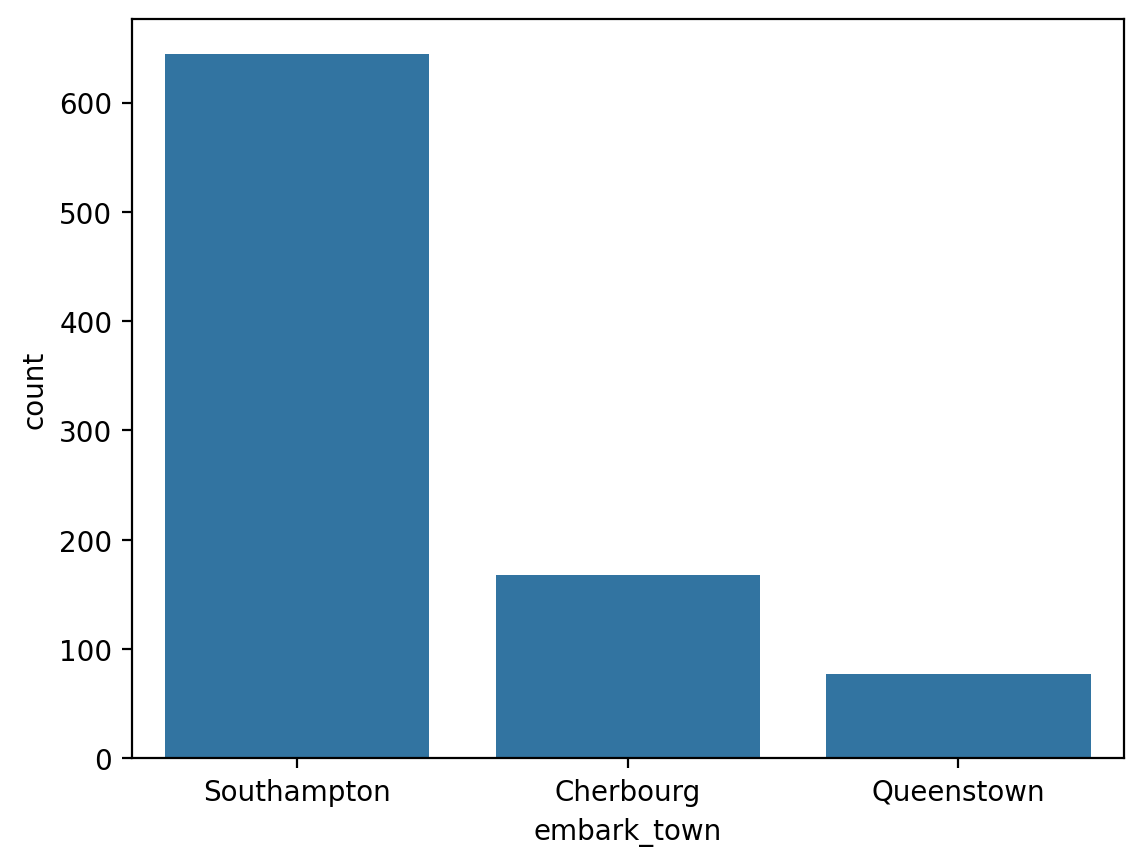

In [15]:
sns.countplot(x="embark_town", data=df)
#df["embarked"].fillna(df.mean())

In [16]:
#Vuelve a mostrar las 10 primeras muestras del dataframe (esta vez, ya no debería haber NaNs)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True


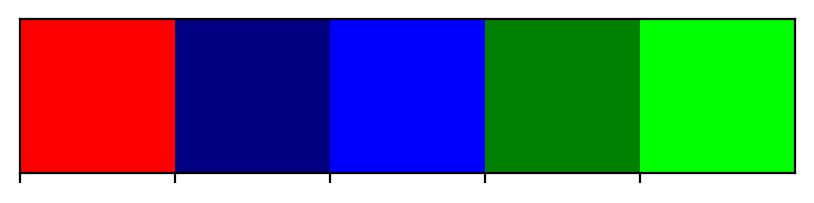

In [17]:
#Personaliza una paleta con los colores que más te gusten para utilizarla en los siguientes gráficos
paleta_personalizada = sns.color_palette(["#FF0000", "#000080","#0000FF", "#008000", "#00FF00"])
sns.palplot(paleta_personalizada)

sns.set_palette(["#FF0000", "#000080","#0000FF", "#008000", "#00FF00"]) # Aquí se configura

- - -
1 - Realiza un plot que muestre el número de pasajeros por cada clase (class) de billete.



<Axes: xlabel='class', ylabel='count'>

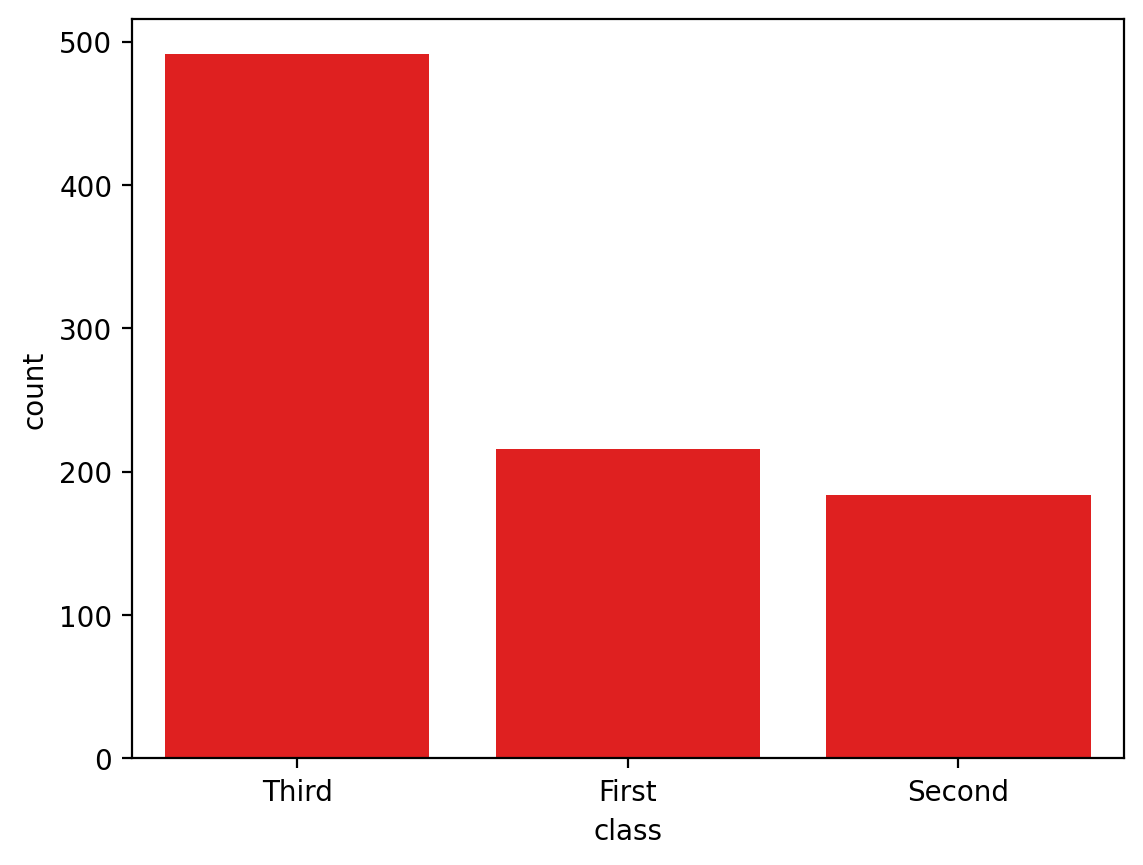

In [18]:
sns.countplot(x="class", data=df)

- - -
2 - A continuación, crea otro plot que muestre el número de pasajeros por cada clase pero segregados por sexo.

<Axes: xlabel='class', ylabel='count'>

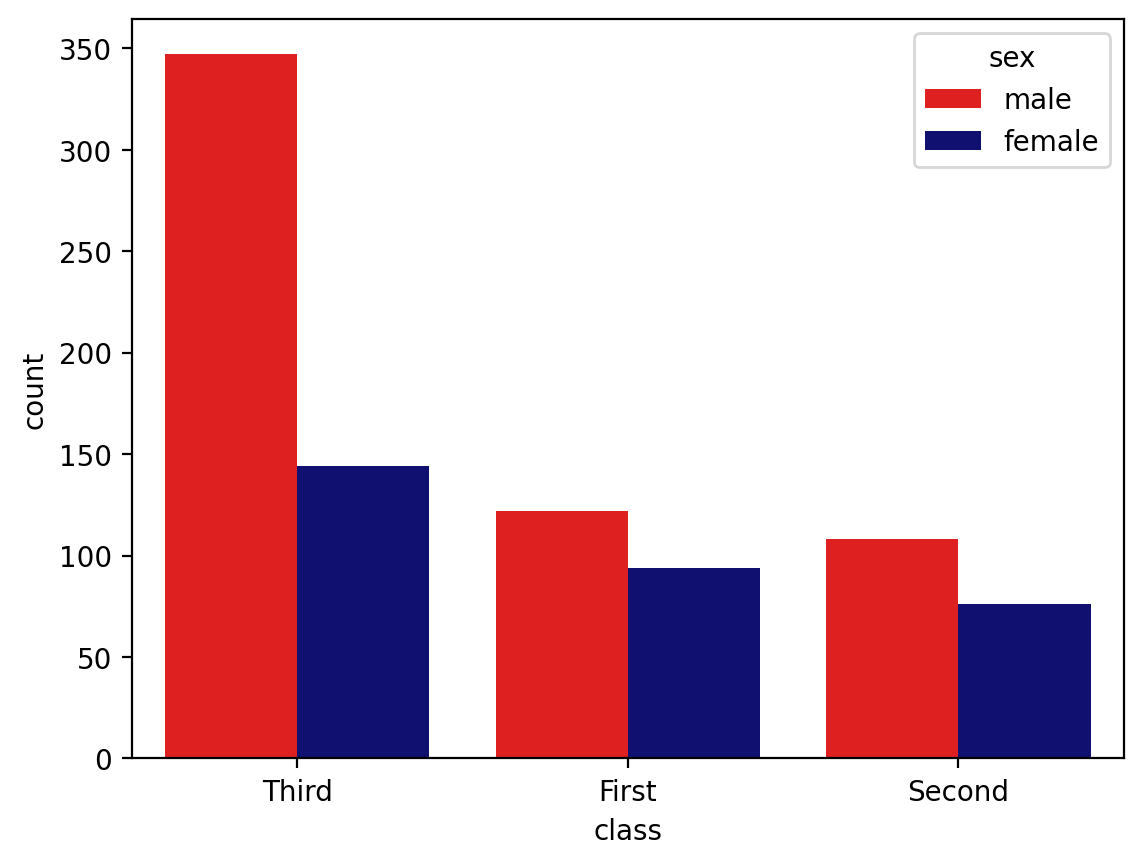

In [19]:
sns.countplot(x="class", hue="sex",data=df)

- - -
3 - Genera un plot kde de las edades de los pasajeros.

<Axes: xlabel='age', ylabel='Density'>

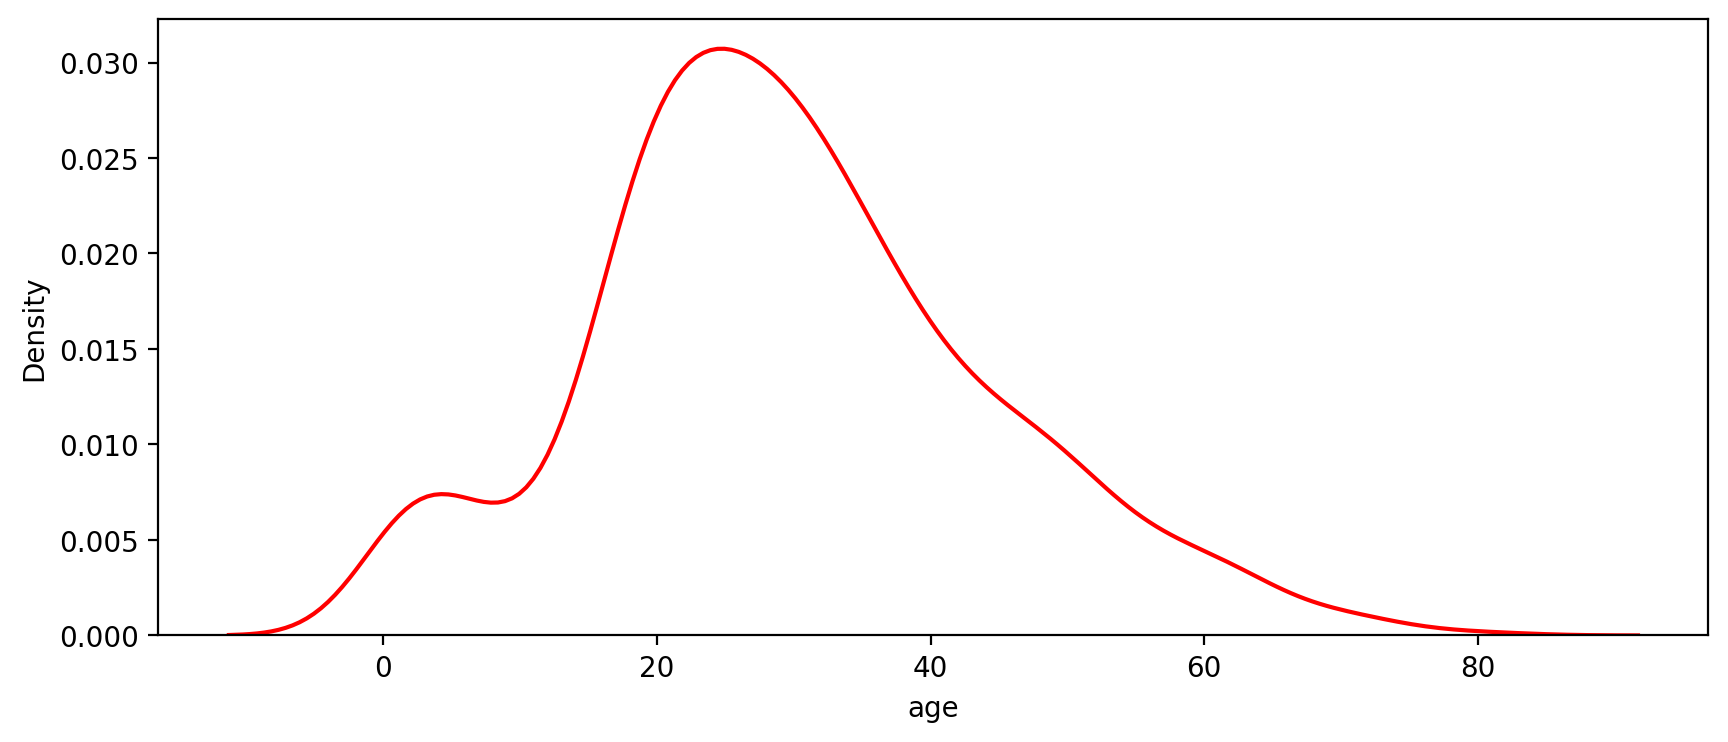

In [20]:
plt.figure(figsize=(10,4))
sns.kdeplot(df["age"])

- - -
4 - Genera un histograma de "fare" (tarifa del pasajero).

<Axes: xlabel='fare', ylabel='Count'>

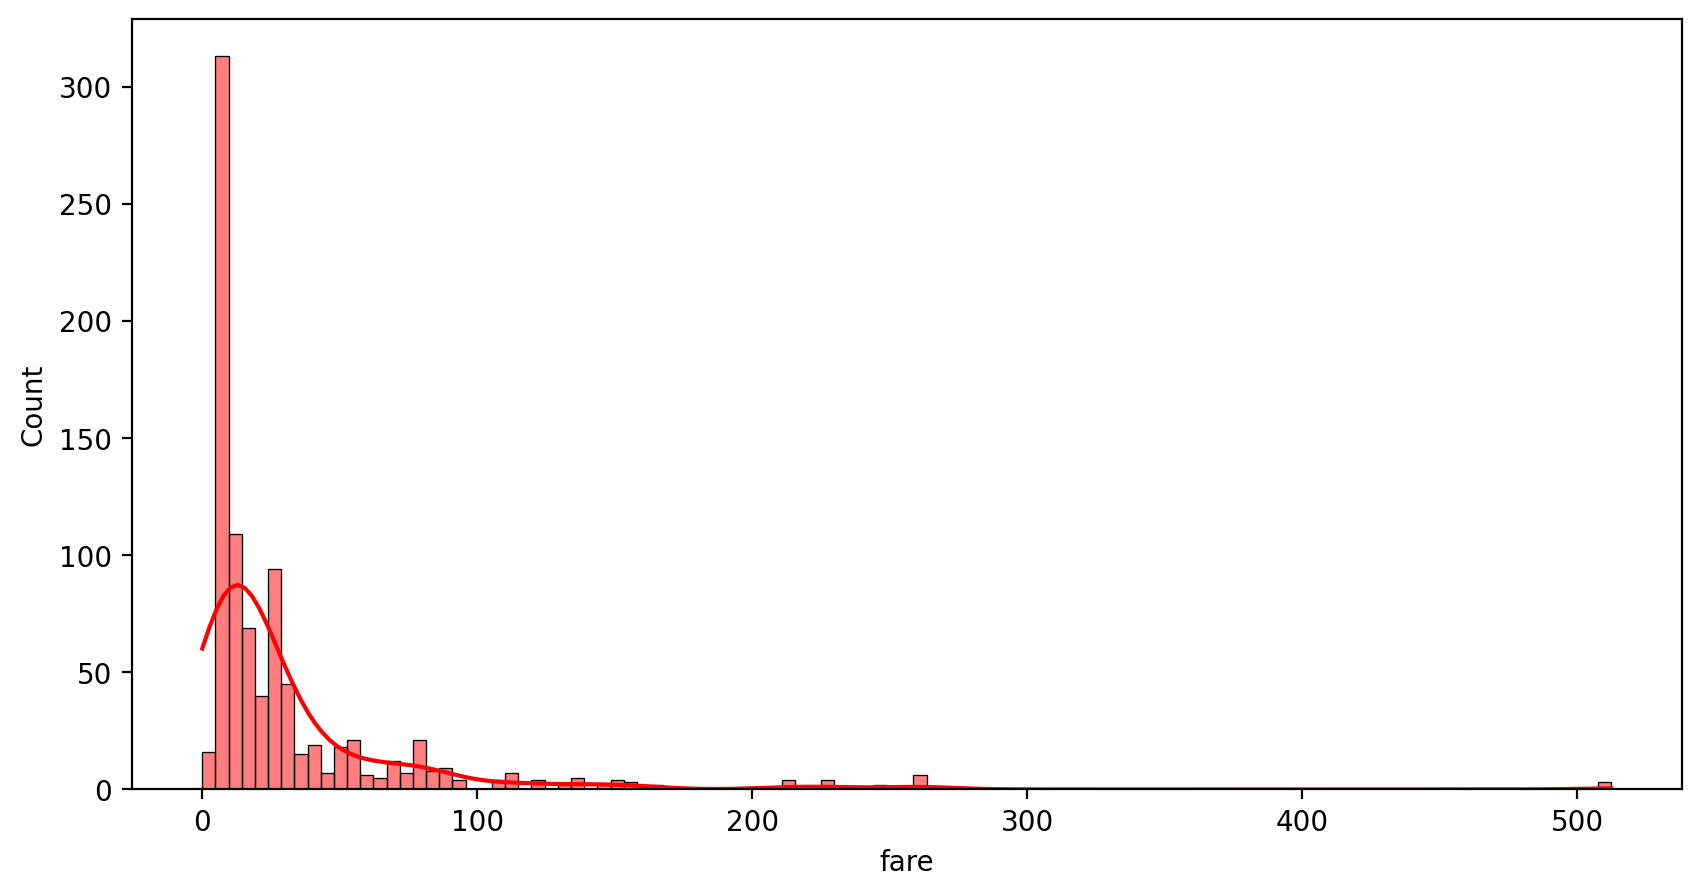

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df["fare"], kde=True)

<Axes: xlabel='fare', ylabel='Count'>

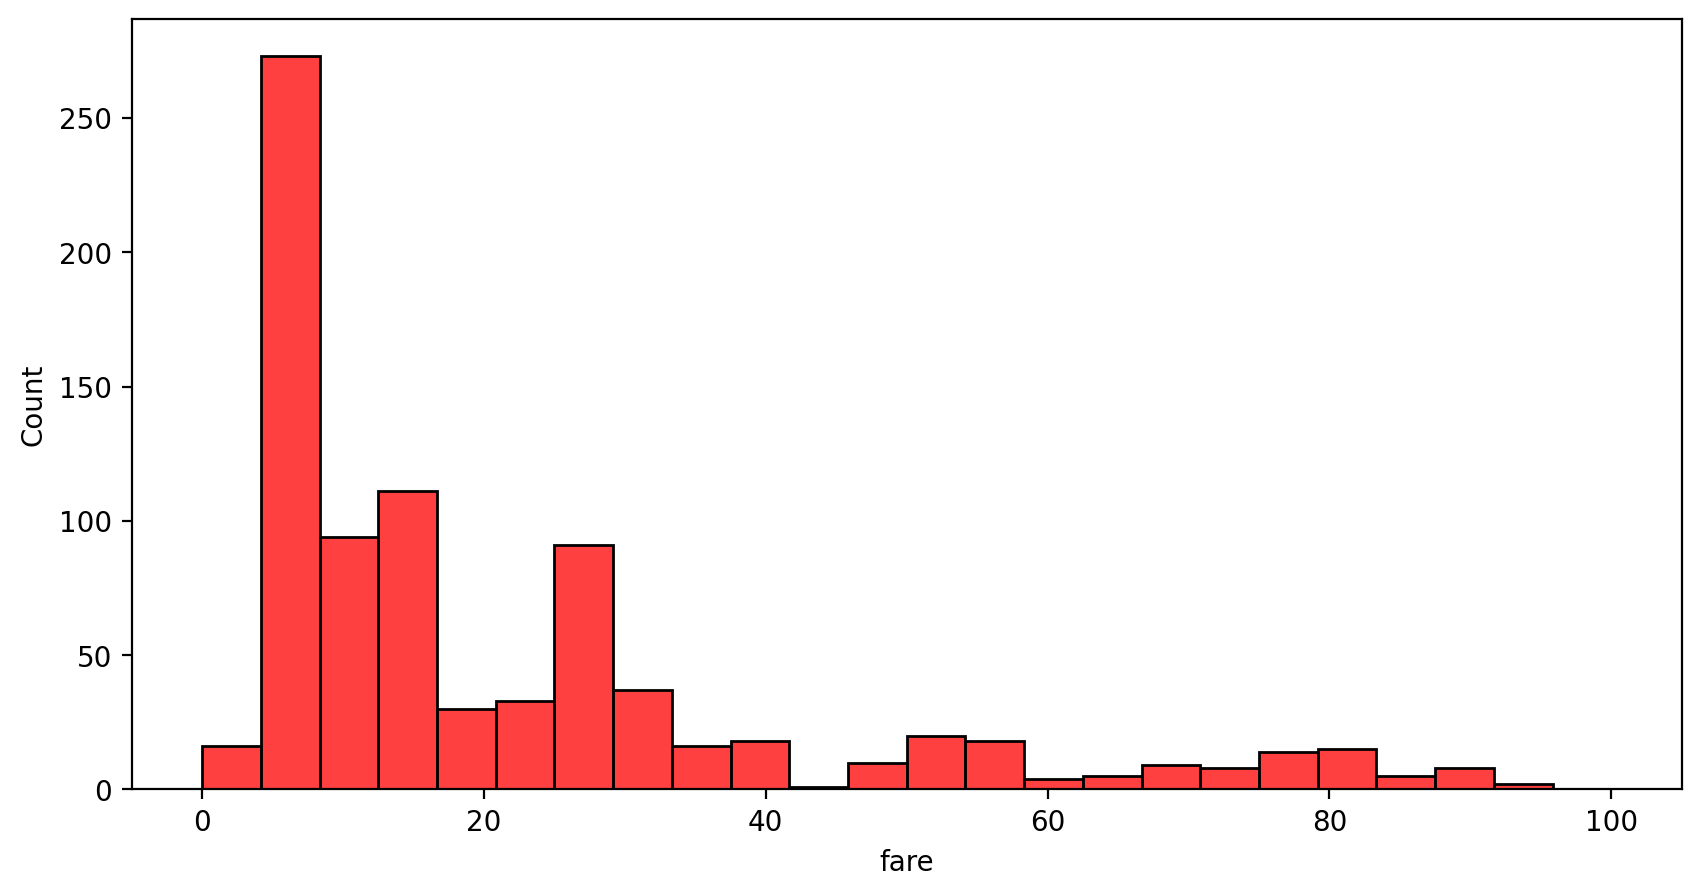

In [22]:
# Graficamos solo hasta 100
plt.figure(figsize=(10,5))
sns.histplot(df["fare"], binrange=(0, 100))

- - -
5 - Genera un stripplot de la tarifa del pasajero según su pueblo de embarque.

<Axes: xlabel='embark_town', ylabel='fare'>

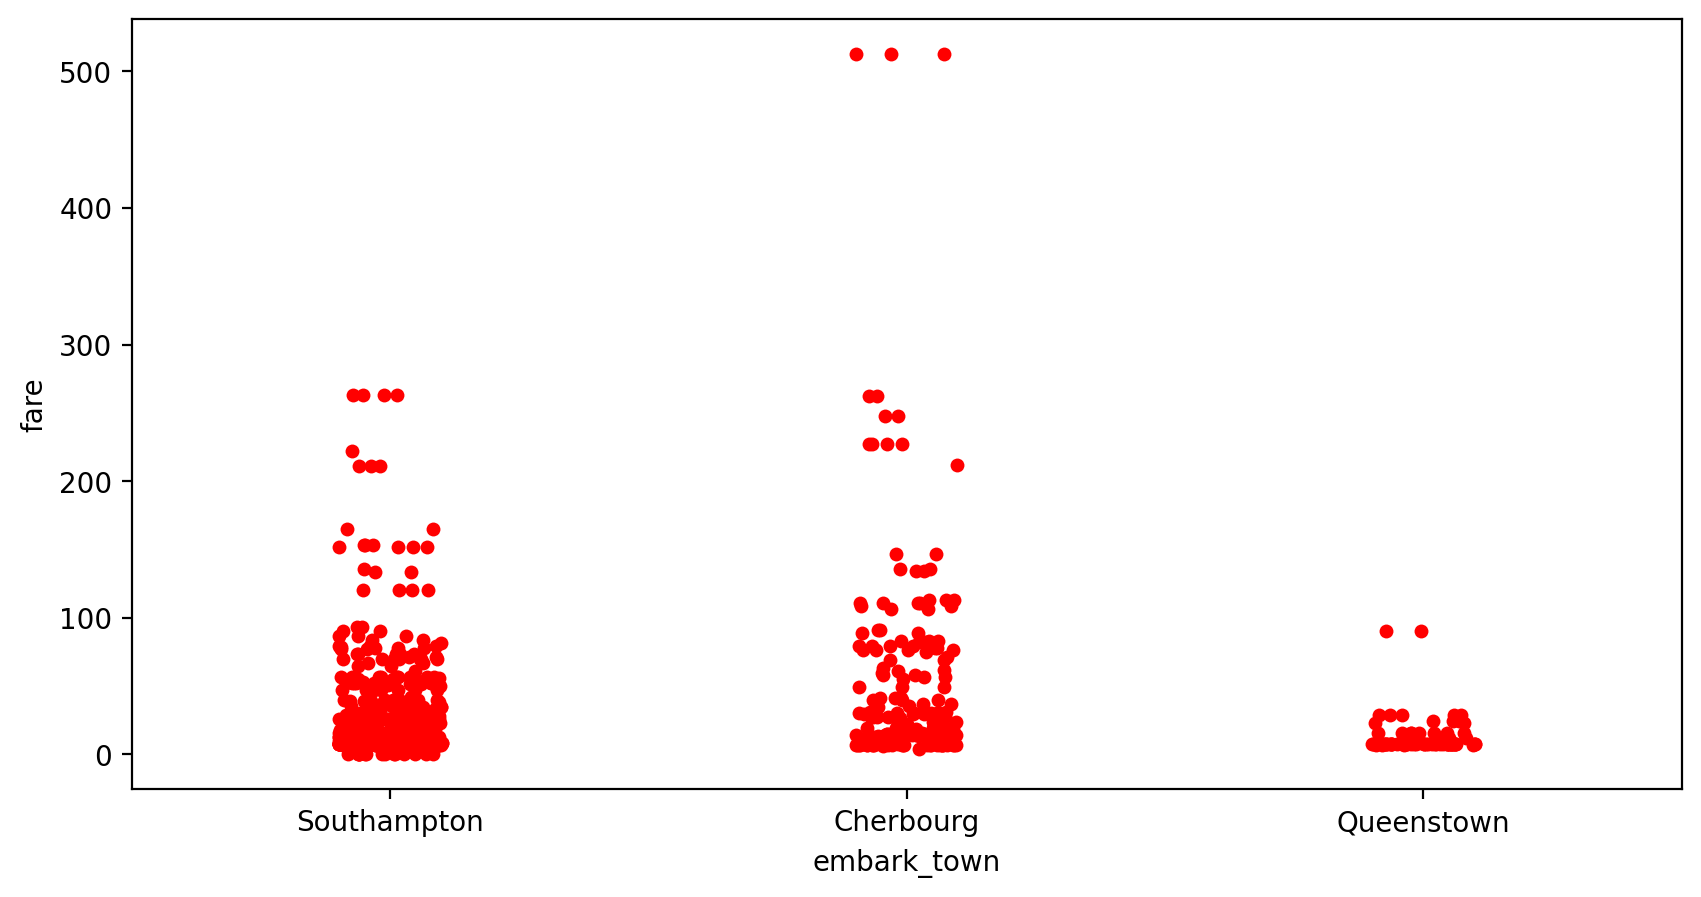

In [25]:
plt.figure(figsize=(10,5))
sns.stripplot(x="embark_town", y="fare", data=df)

6 - A continuación, distingue el stripplot anterior por el sexo de los pasajeros.

<Axes: xlabel='embark_town', ylabel='fare'>

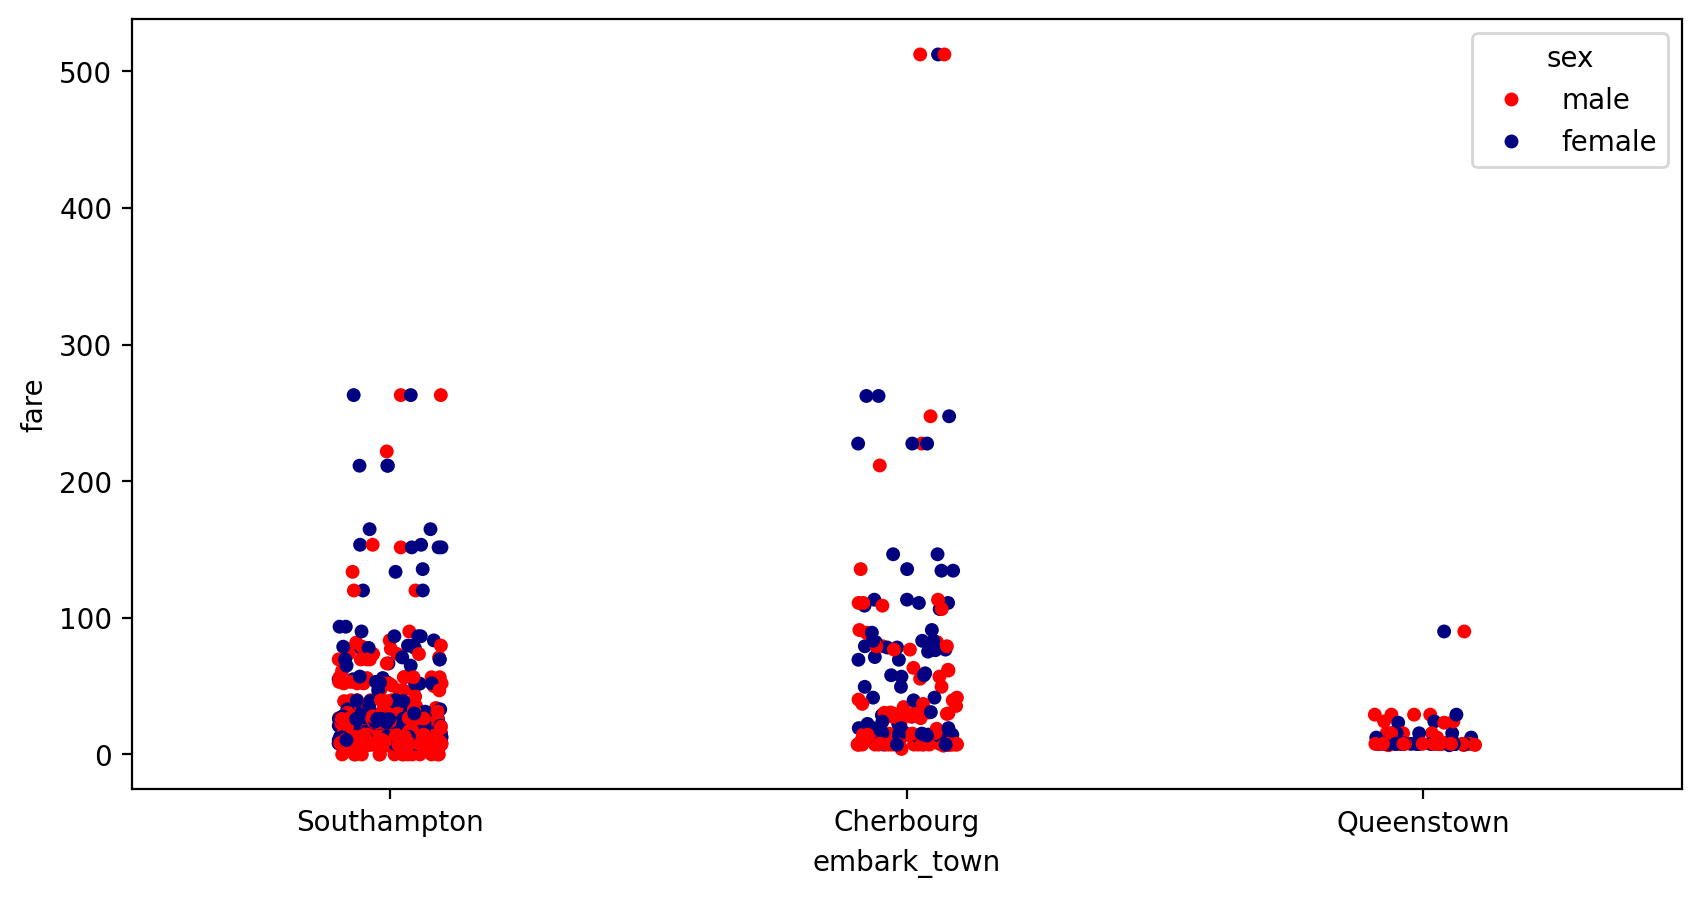

In [26]:
plt.figure(figsize=(10,5))
sns.stripplot(x="embark_town", y="fare", hue = "sex", data=df)

7 - Muestra un boxplot de la tarifa del pasajero segregada por pueblo de embarque.

<Axes: xlabel='embark_town', ylabel='fare'>

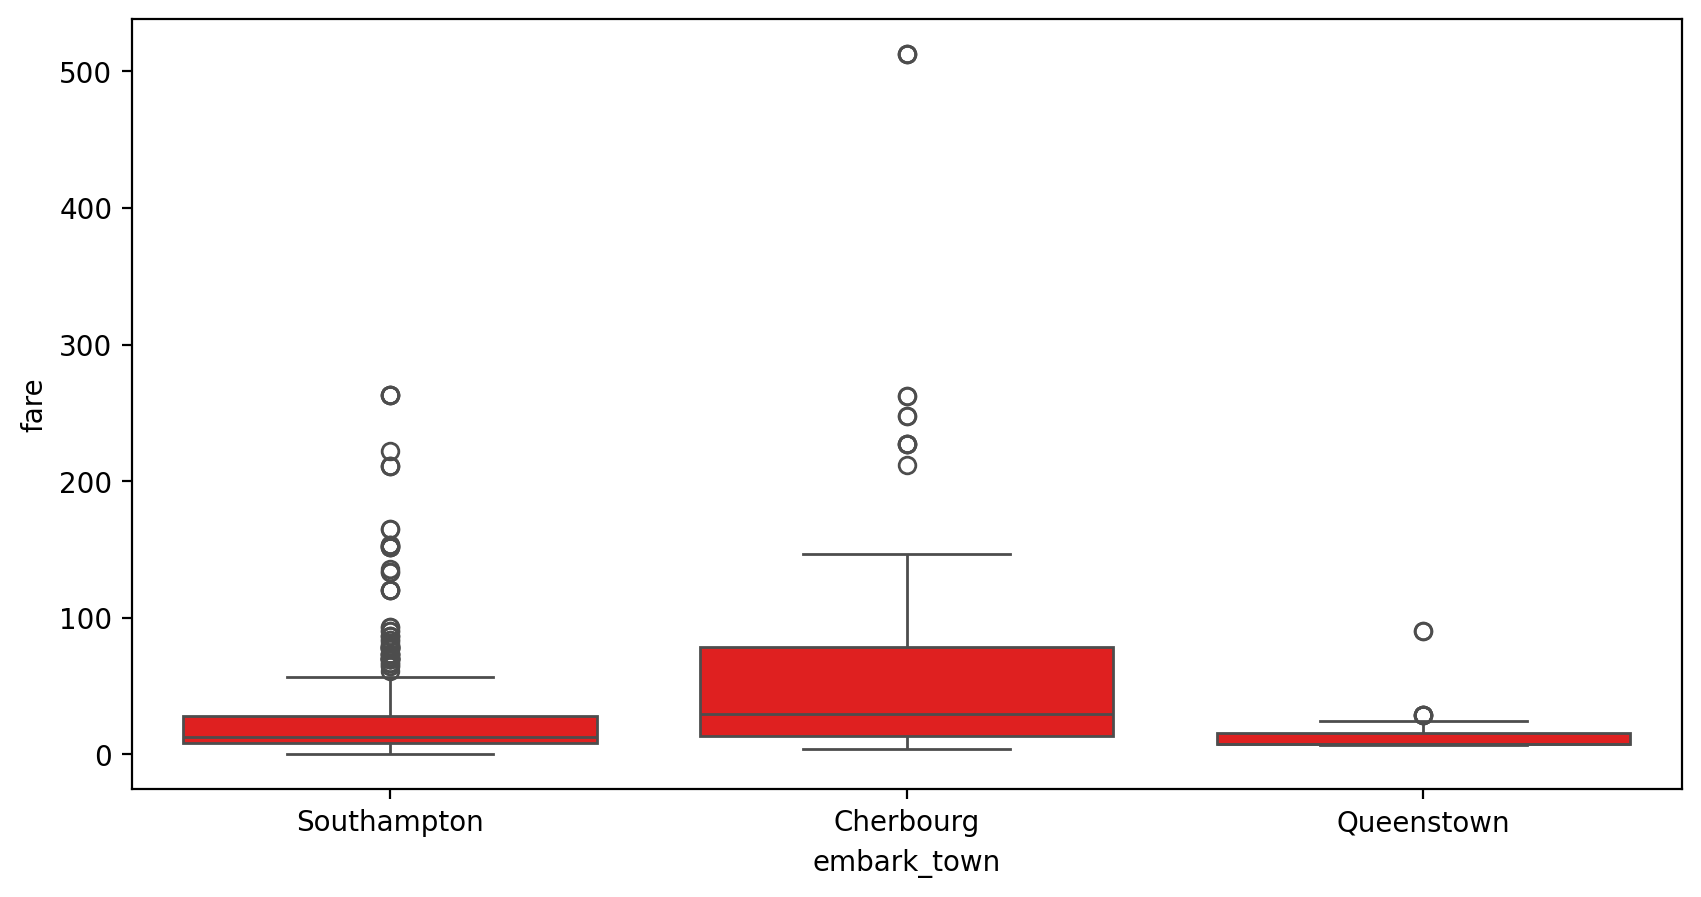

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x="embark_town", y="fare", data=df)

- - -
8 - Obtén un mapa de calor del dataframe para ver la correlación entre las distintas características. ¿Qué conclusiones podemos extraer?

<Axes: >

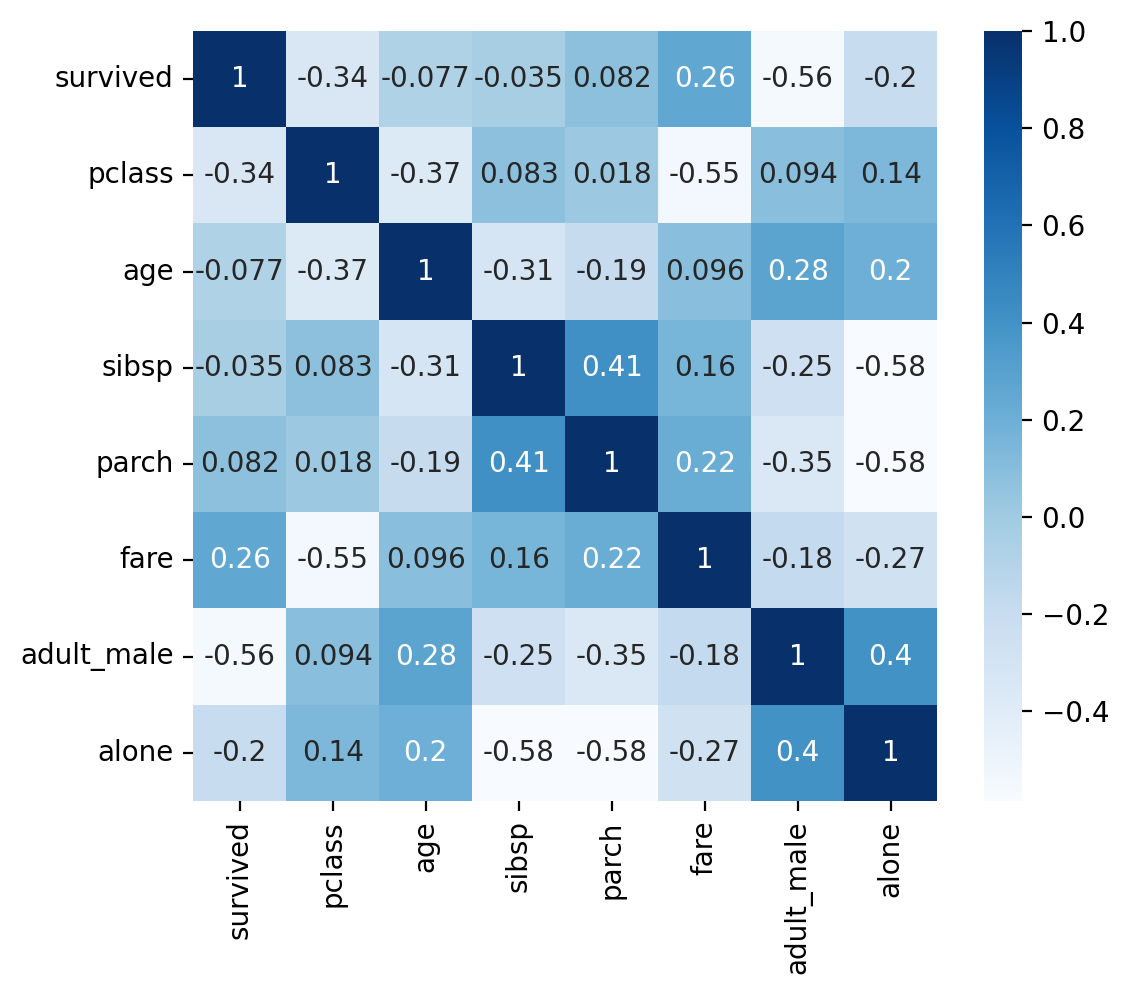

In [35]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

- - -
9 - Lleva a cabo un scatterplot de la tarifa del pasajero y edad.

<Axes: xlabel='age', ylabel='fare'>

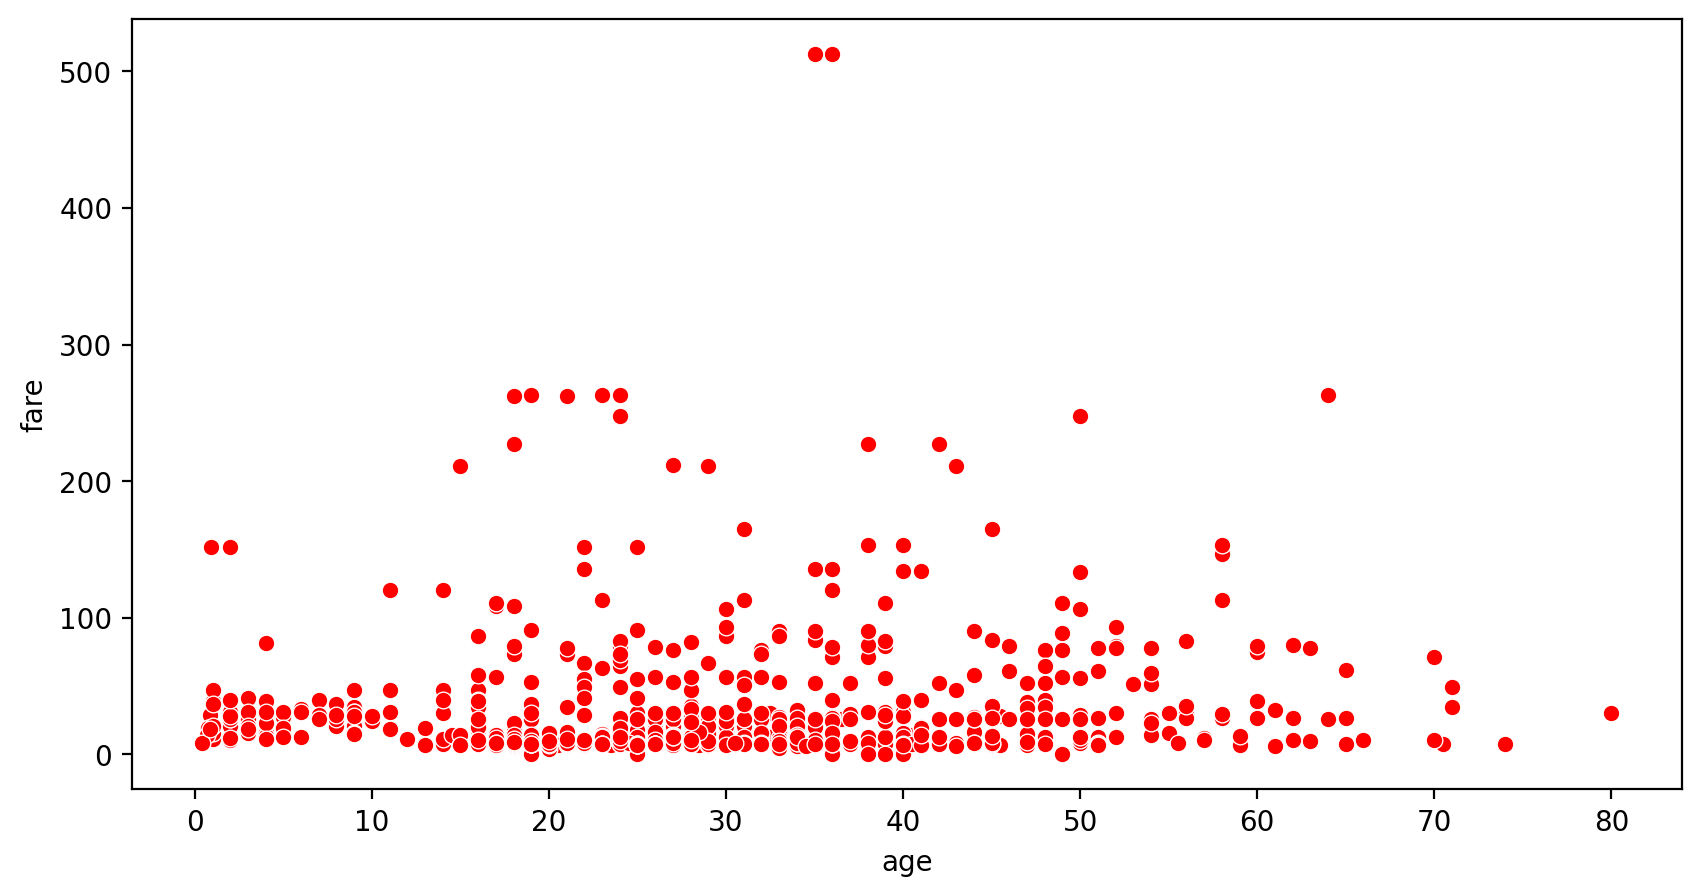

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="age", y="fare", data=df)

- - -
10 - A continuación, distingue el scatterplot anterior por la clase en la que viajaban los pasajeros.

<Axes: xlabel='age', ylabel='fare'>

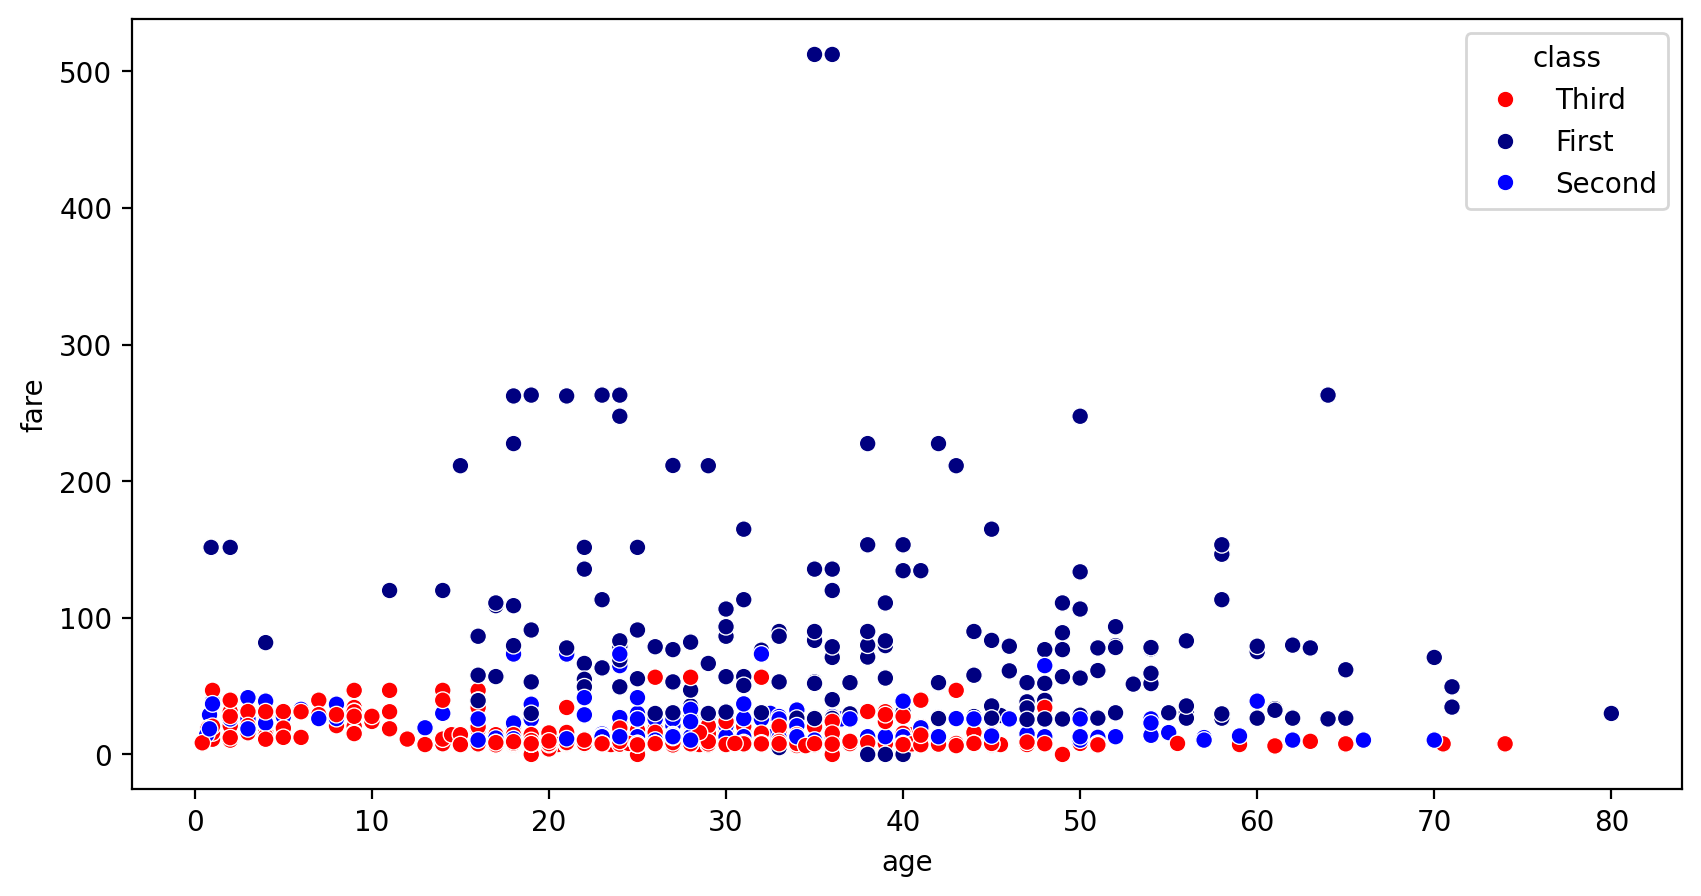

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="age", y="fare", hue = "class", data=df)

- - -